# Camada equivalente gravimétrica

## Importando as bibliotecas

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import prism_grav
import eqlayer

## Gerando as coordenadas de observação

In [3]:
Nx = 100
Ny = 50
area = [-1500.,1500.,-1500.,1500.]
shape = (Nx,Ny)

In [4]:
x = np.linspace(area[0],area[1],num=Nx)
y = np.linspace(area[2],area[3],num=Ny) 
yc,xc = np.meshgrid(y,x)

In [5]:
spacing = y[1] - y[0]

In [6]:
spacing

61.224489795918316

In [7]:
voo = -100.
zc = voo*np.ones_like(xc)

In [8]:
coordinates = np.array([yc.ravel(),xc.ravel(),zc.ravel()])

## Gerando o modelo

In [9]:
densities = np.array([3000.,3000.])

In [10]:
modelo = np.array([[-50.,50., -600.,250.,200.,350.],
                   [-600.,600.,700.,800.,200.,350.]])

### Cálculo da componente gravitacional do modelo

In [11]:
gz = prism_grav.gravitational(coordinates,modelo,densities,field="g_z")

### Gerando um conjunto de dados observados com ruído Gaussiano

In [12]:
np.random.seed(seed=40)
std_noise = 0.02*np.max(np.abs(gz))

r = np.random.normal(0.0, std_noise, gz.size)

print ('%.3f nT' % std_noise)

0.030 nT


In [13]:
gz_obs = gz + r

## Visualização dos dados observados

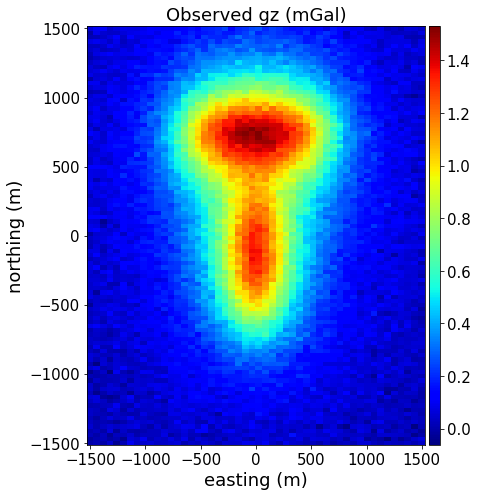

In [14]:
title_font = 18
bottom_font = 15
plt.close('all')
plt.figure(figsize=(7,7), tight_layout=True)

plt.xlabel('easting (m)', fontsize = title_font)
plt.ylabel('northing (m)', fontsize = title_font)
plt.title('Observed gz (mGal)', fontsize=title_font)
plt.pcolor(yc,xc,gz_obs.reshape(shape),shading='auto',cmap='jet')
plt.tick_params(axis='both', which='major', labelsize=bottom_font)
cb = plt.colorbar(pad=0.01, aspect=40, shrink=1.0)
cb.ax.tick_params(labelsize=bottom_font)

file_name = 'images/observed_gz'
plt.savefig(file_name+'.png',dpi=300)

plt.show()

## Resolvendo o problema inverso 

### Gerando a camada equivalente

In [15]:
depth = 150.
zs = depth*np.ones_like(xc)
ys = yc
xs = xc

In [16]:
sources = np.array([ys.ravel(),xs.ravel(),zs.ravel()])

### Resolvendo a equação de mínimos quadrados regularizado 

In [17]:
I = np.identity(xs.size)

In [18]:
G = eqlayer.sensitivity_grav(coordinates,sources)

In [19]:
mu = 1e-19

In [20]:
p = np.linalg.solve(np.dot(G.T,G) + mu*I,np.dot(G.T,gz_obs))

In [21]:
gz_pred = eqlayer.gz(coordinates,sources,p)

In [22]:
residuals = gz_obs - gz_pred
mean = np.mean(residuals)
std_deviation = np.std(residuals)

## Comparando dado observado com os dados gerado pela camada

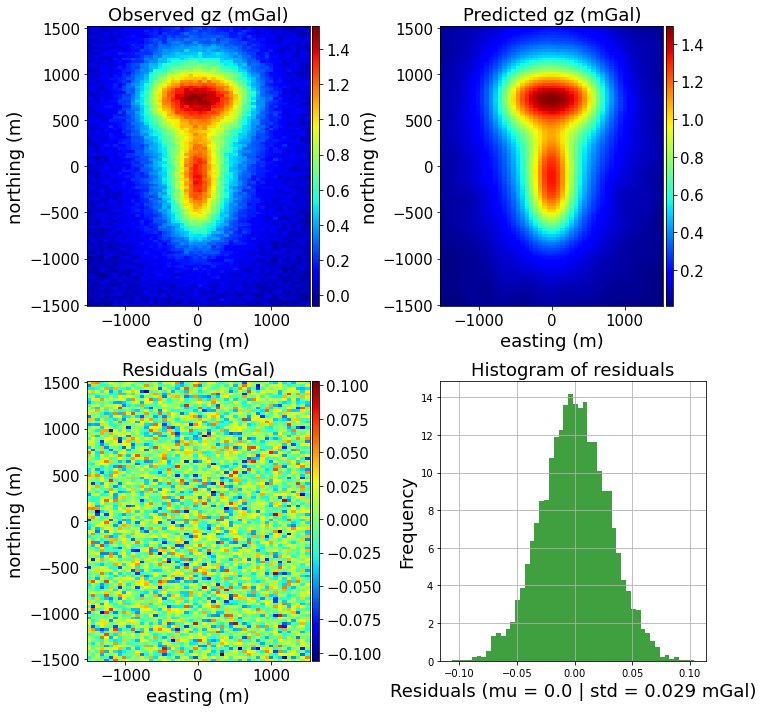

In [23]:
title_font = 18
bottom_font = 15
plt.close('all')
plt.figure(figsize=(10,10), tight_layout=True)

plt.subplot(2,2,1)
plt.xlabel('easting (m)', fontsize = title_font)
plt.ylabel('northing (m)', fontsize = title_font)
plt.title('Observed gz (mGal)', fontsize=title_font)
plt.pcolor(yc,xc,gz_obs.reshape(shape),shading='auto',cmap='jet')
plt.tick_params(axis='both', which='major', labelsize=bottom_font)
cb = plt.colorbar(pad=0.01, aspect=40, shrink=1.0)
cb.ax.tick_params(labelsize=bottom_font)

plt.subplot(2,2,2)
plt.xlabel('easting (m)', fontsize = title_font)
plt.ylabel('northing (m)', fontsize = title_font)
plt.title('Predicted gz (mGal)', fontsize=title_font)
plt.pcolor(yc,xc,gz_pred.reshape(shape),shading='auto',cmap='jet')
plt.tick_params(axis='both', which='major', labelsize=bottom_font)
cb = plt.colorbar(pad=0.01, aspect=40, shrink=1.0)
cb.ax.tick_params(labelsize=bottom_font)

plt.subplot(2,2,3)
plt.xlabel('easting (m)', fontsize = title_font)
plt.ylabel('northing (m)', fontsize = title_font)
plt.title('Residuals (mGal)', fontsize=title_font)
plt.pcolor(yc,xc,residuals.reshape(shape),shading='auto',cmap='jet')
plt.tick_params(axis='both', which='major', labelsize=bottom_font)
cb = plt.colorbar(pad=0.01, aspect=40, shrink=1.0)
cb.ax.tick_params(labelsize=bottom_font)

plt.subplot(2,2,4)
n, bins, patches = plt.hist(residuals, 50, density=True, facecolor='g', alpha=0.75)
plt.xlabel('Residuals (mu = %.1f | std = %.3f mGal)' % (mean,std_deviation),fontsize = title_font)
plt.ylabel('Frequency',fontsize = title_font)
plt.title('Histogram of residuals',fontsize = title_font)
plt.grid(True)

file_name = 'images/data_fitting'
plt.savefig(file_name+'.png',dpi=300)

plt.show()

### Distribuição de massa sobre a camada

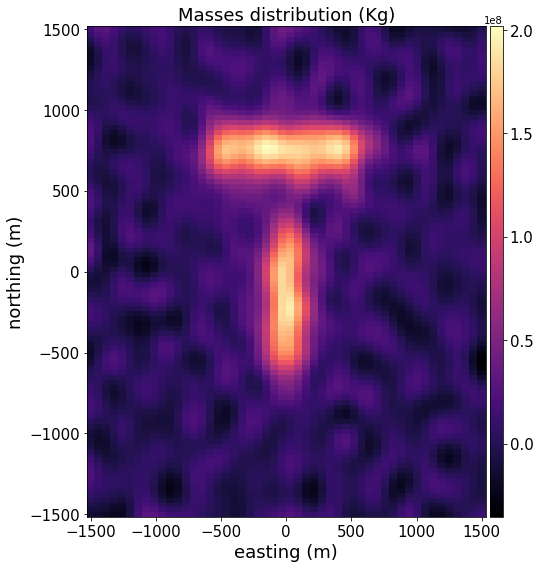

In [24]:
plt.figure(figsize=(8,8), tight_layout=True)
plt.xlabel('easting (m)', fontsize = title_font)
plt.ylabel('northing (m)', fontsize = title_font)
plt.title('Masses distribution (Kg)', fontsize=title_font)
plt.pcolor(yc,xc,p.reshape(shape),shading='auto',cmap='magma')
plt.tick_params(axis='both', which='major', labelsize=bottom_font)
cb = plt.colorbar(pad=0.01, aspect=40, shrink=1.0)
cb.ax.tick_params(labelsize=bottom_font)

plt.show()